# ASTR 507 HW3 - COBE Blackbody Spectrum

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Read in table 4 data.

In [2]:
infile = './firas_monopole_spec_v1.txt'
ffreq, sspec, rresid, eerr, ggalpole = np.loadtxt(infile,unpack=True)

# Column 1 = frequency from Table 4 of Fixsen et al., units = cm^-1
# Column 2 = FIRAS monopole spectrum computed as the sum
#             of a 2.725 K BB spectrum and the
#             residual in column 3, units = MJy/sr
# Column 3 = residual monopole spectrum from Table 4 of Fixsen et al.,
#             units = kJy/sr
# Column 4 = spectrum uncertainty (1-sigma) from Table 4 of Fixsen et al.,
#             units = kJy/sr
# Column 5 = modeled Galaxy spectrum at the Galactic poles from Table 4 of
#             Fixsen et al., units = kJy/sr
#

### Define the Physical Constants (very sensitive!)

In [3]:
import astropy.constants as 
h = 6.6260755e-27 # ergs/s
c = 2.99792458e10 # cm/s 
k = 1.38064852e-16 # erg/K

### Convert input to cgs units

In [4]:
# 1 Jy = 1e-23 erg/s cm^2 Hz = erg/s
freq = ffreq * c # cm^-1 -> s^-1
spec = sspec * 1e6 * 1e-23 # MJy -> erg/s
resid = rresid * 1e3 * 1e-23 # kJy -> erg/s
err = eerr * 1e3 * 1e-23 #kJy -> erg/s
galpole = ggalpole * 1e3 # kJy -> erg/s

### Check against the residuals from Fixsen et al 1996

In [5]:
T0 = 2.7250 # from authors model
x = h * freq / (k * T0)
f0 = 2. * (h / c**2.) * freq**3. / (np.exp(x) - 1.)

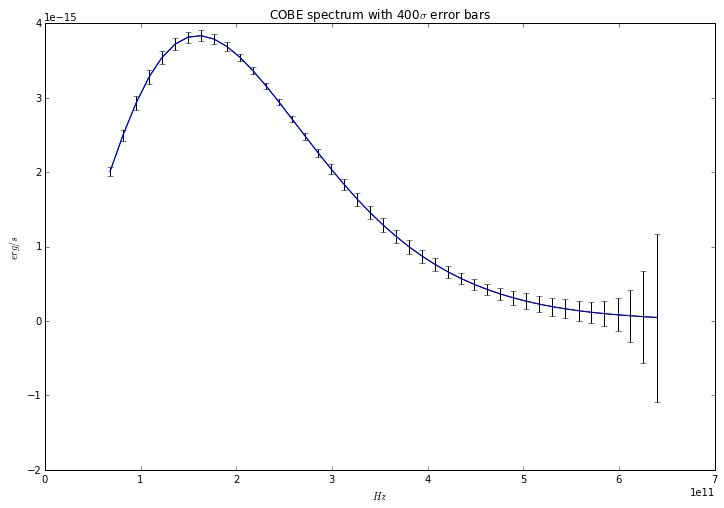

In [6]:
plt.figure(figsize=(12, 8))
plt.errorbar(freq, spec, xerr=0.0, yerr=err*400,color='k')
plt.plot(freq,f0)
plt.xlabel(r'$Hz$')
plt.ylabel(r'$erg / s$')
plt.title(r'COBE spectrum with 400$\sigma$ error bars')



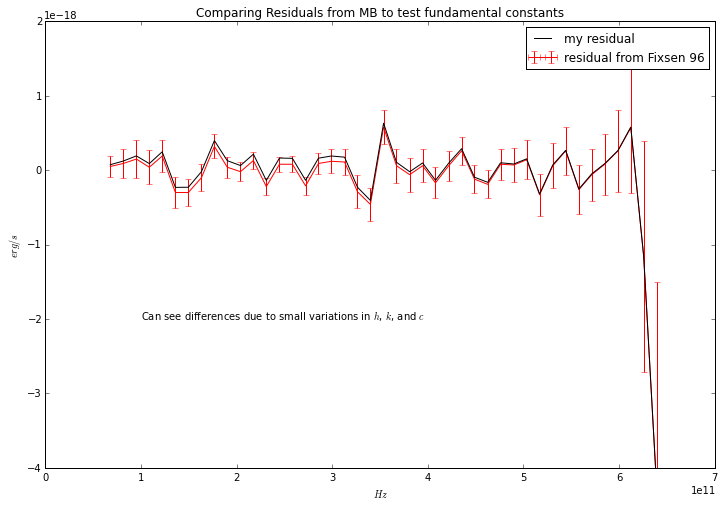

In [7]:
plt.figure(figsize=(12, 8))
myres = spec - f0
# plt.errorbar(freq, myres, xerr=0.0, yerr=0.0, color='k', label='my residual')
plt.errorbar(freq, resid, xerr=0.0, yerr=err, color='r', label='residual from Fixsen 96')
plt.plot(freq, myres, color='k', label='my residual')
plt.legend()
plt.xlabel(r'$Hz$')
plt.ylabel(r'$erg / s$')
plt.title("Comparing Residuals from MB to test fundamental constants")
plt.ylim([-4e-18, 2e-18])
plt.text(1e11, -2e-18, r"Can see differences due to small variations in $h$, $k$, and $c$")

### Make table of $\mu$ and $T$ to probe parameter space

In [8]:
npts = 10000
minT = 2.72
maxT = 2.73
minMu = -1e-19
maxMu = 1e-19
miny = minMu / (k * T0)
maxy = maxMu / (k * T0)



T = np.linspace(minT,maxT,npts)
mu = np.linspace(minMu,maxMu,npts)
y = np.linspace(miny, maxy, npts) # y = mu / kT


tab_tmu = np.empty((npts,npts), dtype=float)
for i,t in enumerate(T):
    for j,m in enumerate(y):
        x = h * freq / (k * t)
        model = 2. * (h / c**2.)  * freq**3. / (np.exp(x - m) - 1.)
        chi2 = np.sum(((model - spec)**2.) / err**2.)
        tab_tmu[i][j] = chi2 

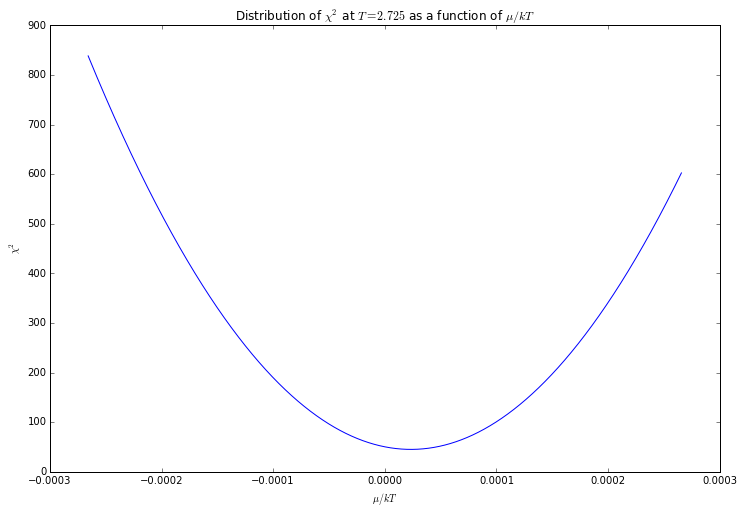

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(y, tab_tmu[npts/2])
plt.title(r"Distribution of $\chi^{2}$ at $T = 2.725$ as a function of $\mu / kT$")
plt.ylabel(r"$\chi^{2}$")
plt.xlabel(r"$\mu / kT$")

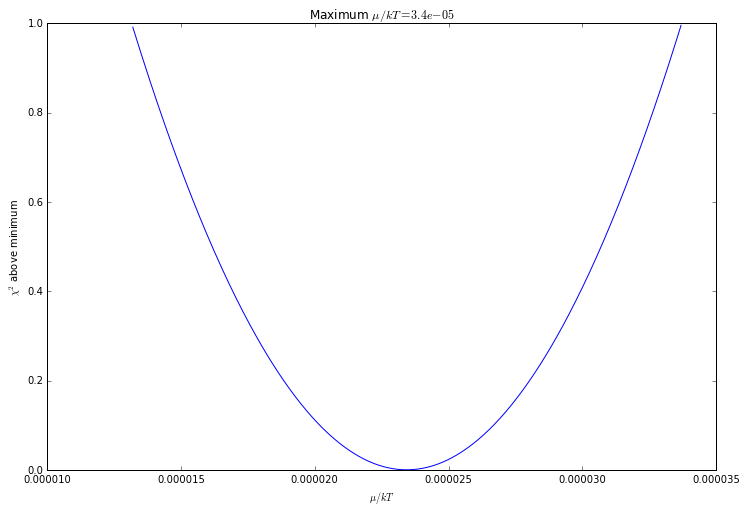

In [13]:
plt.figure(figsize=(12, 8))
tab_tmu[npts/2].min()
sig1 = np.where(tab_tmu[npts/2] <= tab_tmu[npts/2].min()+1)
plt.plot(y[sig1], tab_tmu[npts/2][sig1]-tab_tmu[npts/2][sig1].min())
mew = y[sig1].max()
plt.title(r"Maximum $\mu / kT = {:2.2}$".format(mew))
plt.ylabel(r"$\chi^{2}$ above minimum")
plt.xlabel(r"$\mu / kT$")

# final_result = mew * k * T0
# print final_result 
# plt.text(x=y[sig1].max()/2., 0.66, s=final_result)
# y[sig1].max()/2.

###  find the maximum $\mu$:

In [23]:
Z = tab_tmu
select_1sig = np.where(Z <= Z.min()+2)
max_mu_1 = y[select_1sig[1]].max()
max_T_1 = T[select_1sig[0]].max()
meanT = T[select_1sig[0]].mean()
print max_mu_1
print max_T_1
print('maximum mu at 1-sigma = {}'.format(max_mu_1))
print('mean T in 1-sigma = {}'.format(meanT))

5.61685600529e-05
2.72504450445
maximum mu at 1-sigma = 5.61685600529e-05
mean T in 1-sigma = 2.72501077614


### make a contour plot

<a list of 2 text.Text objects>

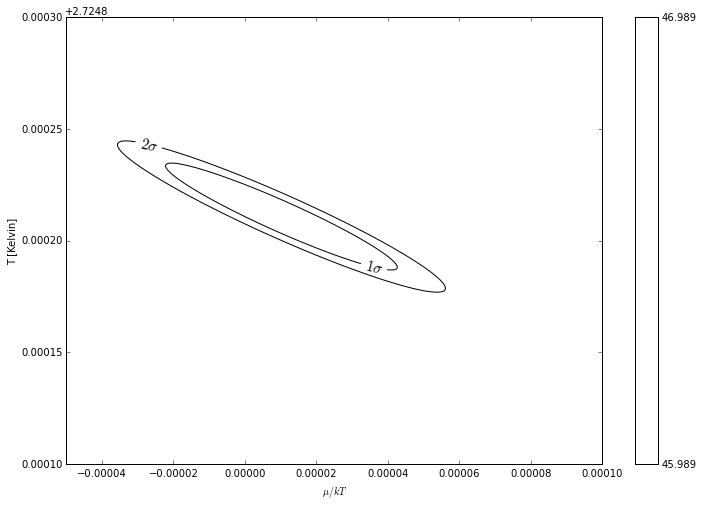

In [14]:
plt.figure(figsize=(12, 8))

levels = [0, 2.3, 6.18, 11.83, 19.33]
levels = [Z.min()+1., Z.min()+2.]
z_min = Z.min()
z_max = Z.max()

# CS1 = plt.pcolormesh(mu, T, Z, cmap='RdBu')
CS2 = plt.contour(y, T, Z, levels, colors='black')
plt.xlim([-0.00005,0.0001])
plt.ylim([2.7249,2.7251])


plt.colorbar()
plt.ylabel("T [Kelvin]")
plt.xlabel(r"$\mu / kT $")
# plt.title(r'Table of T and $\mu$. Maximum $\mu = {0:.2g}$ at $2\sigma$'.format(max_mu_2))
keys = [r'$1\sigma$',r'$2\sigma$',r'$3\sigma$',r'$4\sigma$']
plt.clabel(CS2, inline=1, fontsize=15, fmt={0:'', Z.min()+1.:r'$1\sigma$', 
                                            Z.min()+2.:r'$2\sigma$'})
